In [59]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, GRU
from keras.layers import Dense

import matplotlib as plt
get_ipython().magic(u'matplotlib inline')

import datetime as dt, itertools, pandas as pd, matplotlib.pyplot as plt, numpy as np


In [60]:
def split_sequence(sequence, n_steps=7, lookahead=0):
    X, y = list(), list()
    for i in range(lookahead,len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix >= len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i-lookahead:end_ix-lookahead], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

### Data preprocessing

In [56]:
tsdataframe = pd.read_csv('/content/drive/MyDrive/timeseries_lab3.csv')
tsdataframe

,Date,Price
0,1/1/2006,569.865168
1,1/2/2006,593.271930
2,1/3/2006,606.471193
3,1/4/2006,576.932773
4,1/5/2006,573.812500
...,...,...
3647,12/27/2015,832.554167
3648,12/28/2015,880.513919
3649,12/29/2015,856.883910
3650,12/30/2015,888.002212


In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
tsdata = np.load('/content/drive/MyDrive/timeseries_lab3.npy')

In [23]:
tsdata

array([569.86516854, 593.27192983, 606.47119342, ..., 856.88391039,
       888.00221239, 918.49879518])

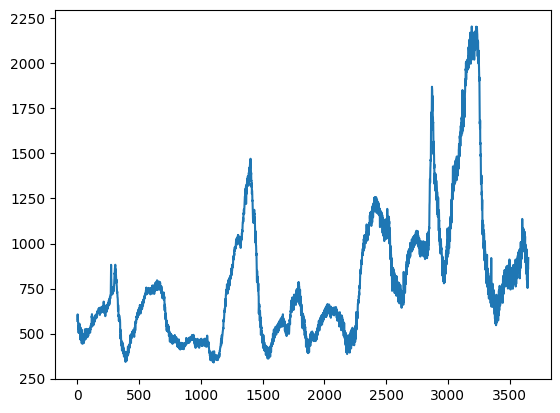

In [24]:
plt.plot(tsdata)

In [25]:
n_steps=7
n_features = 1
train_size = 2557

In [26]:
X, y = split_sequence(tsdata,n_steps)

In [27]:
X

array([[569.86516854, 593.27192983, 606.47119342, ..., 573.8125    ,
        576.17699115, 548.16748768],
       [593.27192983, 606.47119342, 576.93277311, ..., 576.17699115,
        548.16748768, 528.13043478],
       [606.47119342, 576.93277311, 573.8125    , ..., 548.16748768,
        528.13043478, 543.19517544],
       ...,
       [876.92110454, 923.34583333, 807.89142857, ..., 865.42385787,
        832.55416667, 880.51391863],
       [923.34583333, 807.89142857, 753.03703704, ..., 832.55416667,
        880.51391863, 856.88391039],
       [807.89142857, 753.03703704, 865.42385787, ..., 880.51391863,
        856.88391039, 888.00221239]])

In [ ]:
#tsdata[:15]

In [ ]:
#X[:10]

In [ ]:
#y[:4]

In [28]:
X = X.reshape((X.shape[0], X.shape[1], n_features))
trainX = X[:train_size]
trainy = y[:train_size]
testX = X[train_size:]
testy = y[train_size:]

In [ ]:
#trainX

### LSTM model for time series prediction

In [29]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(trainX, trainy, epochs=20, verbose=1)

Epoch 1/20
80/80 [==============================] - 2s 7ms/step - loss: 31124.3047
Epoch 2/20
80/80 [==============================] - 1s 7ms/step - loss: 649.8495
Epoch 3/20
80/80 [==============================] - 1s 7ms/step - loss: 565.4858
Epoch 4/20
80/80 [==============================] - 1s 10ms/step - loss: 600.4246
Epoch 5/20
80/80 [==============================] - 1s 10ms/step - loss: 575.7280
Epoch 6/20
80/80 [==============================] - 1s 9ms/step - loss: 634.3151
Epoch 7/20
80/80 [==============================] - 1s 10ms/step - loss: 607.9211
Epoch 8/20
80/80 [==============================] - 1s 7ms/step - loss: 662.7562
Epoch 9/20
80/80 [==============================] - 0s 6ms/step - loss: 677.6733
Epoch 10/20
80/80 [==============================] - 1s 7ms/step - loss: 593.4159
Epoch 11/20
80/80 [==============================] - 1s 8ms/step - loss: 565.1532
Epoch 12/20
80/80 [==============================] - 1s 7ms/step - loss: 598.8971
Epoch 13/20
80/80 [=

### Prediction (test set)

In [30]:
yhat = model.predict(testX, verbose=0)

In [31]:
pred = []
for i in range(yhat.shape[0]):
    pred.append(yhat[i])
pred = np.array(pred)

Text(0.5, 0, 'Days')

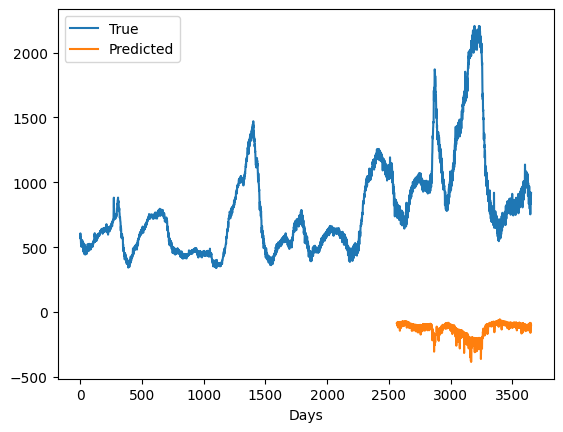

In [32]:
plt.plot(range(len(tsdata)),tsdata,label='True')
plt.plot(range(len(tsdata)-len(testy),len(tsdata)),pred,label='Predicted')
plt.legend(loc='upper left')
plt.xlabel('Days')



Generating Element names using RNN

### Data

In [62]:
data = open('/content/drive/MyDrive/elements.txt', 'r').read()
data= data.lower()
chars = list(set('\n'.join(data)))
data_size, vocab_size = len(data), len(chars)


In [63]:
data

'hydrogen\nhelium\nlithium\nberyllium\nboron\ncarbon\nnitrogen\noxygen\nfluorine\nneon\nsodium\nmagnesium\naluminium\nsilicon\nphosphorus\nsulfur\nchlorine\nargon\npotassium\ncalcium\nscandium\ntitanium\nvanadium\nchromium\nmanganese\niron\ncobalt\nnickel\ncopper\nzinc\ngallium\ngermanium\narsenic\nselenium\nbromine\nkrypton\nrubidium\nstrontium\nyttrium\nzirconium\nniobium\nmolybdenum\ntechnetium\nruthenium\nrhodium\npalladium\nsilver\ncadmium\nindium\ntin\nantimony\ntellurium\niodine\nxenon\ncesium\nbarium\nlanthanum\ncerium\npraseodymium\nneodymium\npromethium\nsamarium\neuropium\ngadolinium\nterbium\ndysprosium\nholmium\nerbium\nthulium\nytterbium\nlutetium\nhafnium\ntantalum\ntungsten\nrhenium\nosmium\niridium\nplatinum\ngold\nmercury\nthallium\nlead\nbismuth\npolonium\nastatine\nradon\nfrancium\nradium\nactinium\nthorium\nprotactinium\nuranium\nneptunium\nplutonium\namericium\ncurium\nberkelium\ncalifornium\neinsteinium\nfermium\nmendelevium\nnobelium\nlawrencium\nrutherfordium\n

In [64]:
# Open the file in read mode
with open('/content/drive/MyDrive/elements.txt', 'r') as file:
    # Read the entire file contents
    data = file.read()

# Print the data read from the file
print(data)


hydrogen
helium
lithium
beryllium
boron
carbon
nitrogen
oxygen
fluorine
neon
sodium
magnesium
aluminium
silicon
phosphorus
sulfur
chlorine
argon
potassium
calcium
scandium
titanium
vanadium
chromium
manganese
iron
cobalt
nickel
copper
zinc
gallium
germanium
arsenic
selenium
bromine
krypton
rubidium
strontium
yttrium
zirconium
niobium
molybdenum
technetium
ruthenium
rhodium
palladium
silver
cadmium
indium
tin
antimony
tellurium
iodine
xenon
cesium
barium
lanthanum
cerium
praseodymium
neodymium
promethium
samarium
europium
gadolinium
terbium
dysprosium
holmium
erbium
thulium
ytterbium
lutetium
hafnium
tantalum
tungsten
rhenium
osmium
iridium
platinum
gold
mercury
thallium
lead
bismuth
polonium
astatine
radon
francium
radium
actinium
thorium
protactinium
uranium
neptunium
plutonium
americium
curium
berkelium
californium
einsteinium
fermium
mendelevium
nobelium
lawrencium
rutherfordium
dubnium
seaborgium
bohrium
hassium
meitnerium
darmstadtium
roentgenium
copernicium
nihonium
flerovium
mos

### Model Architecture

<img src="rnn_langmod.png" style="width:500;height:300px;">

In [65]:
import random
import string
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Read
with open('/content/drive/MyDrive/elements.txt', 'r') as file:
    element_names = file.read().splitlines()

# Defining the dataset
class ElementNamesDataset(Dataset):
    def __init__(self, element_names, max_length=20):
        self.element_names = element_names
        self.max_length = max_length

    def __len__(self):
        return len(self.element_names)

    def __getitem__(self, idx):
        name = self.element_names[idx]
        return name



In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import string
import random

# Defining the dataset
class ElementNamesDataset:
    def __init__(self, element_names):
        self.element_names = element_names

    def __len__(self):
        return len(self.element_names)

    def __getitem__(self, idx):
        return self.element_names[idx]

# RNN models with LSTM
class CharRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CharRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        output, hidden = self.rnn(x, hidden)
        output = self.fc(output)
        return output, hidden

    def init_hidden(self, batch_size):
        return (torch.zeros(1, batch_size, self.hidden_size),
                torch.zeros(1, batch_size, self.hidden_size))

# Generating element names
def generate_element_name(model, start_char='A', max_length=5, temperature=0.5):
    model.eval()
    with torch.no_grad():
        input = torch.zeros(1, 1, len(string.ascii_letters))
        start_char_idx = string.ascii_letters.index(start_char)
        input[0, 0, start_char_idx] = 1
        hidden = model.init_hidden(1)  # Change batch size to 1
        name = start_char

        for i in range(max_length):
            output, hidden = model(input, hidden)
            output_dist = output.squeeze().div(temperature).exp()
            top_i = torch.multinomial(output_dist, 1)[0]
            if top_i == len(string.ascii_letters) - 1:  # End of name
                break
            else:
                char = string.ascii_letters[top_i]
                name += char
                input.zero_()
                input[0, 0, top_i] = 1

        return name

# Read elements
with open("/content/drive/MyDrive/elements.txt", "r") as file:
    element_names = file.read().splitlines()

# Hyperparameters
input_size = len(string.ascii_letters)
hidden_size = 128
output_size = len(string.ascii_letters) + 1
learning_rate = 0.05
num_epochs = 300
batch_size = 64

# Create dataset
dataset = ElementNamesDataset(element_names)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initializing model, criterion, and optimizer
model = CharRNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(num_epochs):
    for names in dataloader:
        for name in names:
            name_encoded = torch.zeros(1, len(name), input_size)
            for idx, char in enumerate(name):
                char_idx = string.ascii_letters.index(char)
                name_encoded[0, idx, char_idx] = 1

            target = torch.zeros(1, len(name) + 1, dtype=torch.long)
            for idx in range(len(name)):
                target[0, idx] = string.ascii_letters.index(name[idx])
            target[0, len(name)] = len(string.ascii_letters)

            optimizer.zero_grad()

            hidden = model.init_hidden(1)
            output, _ = model(name_encoded, hidden)


            loss = criterion(output.view(-1, output_size), target.view(-1)[:-1])

            loss.backward()
            optimizer.step()

# Generating element names
num_names_to_generate = 10
generated_names = []
for _ in range(num_names_to_generate):
    start_char = random.choice(string.ascii_uppercase)
    generated_name = generate_element_name(model, start_char=start_char)
    generated_names.append(generated_name)

# Printing
print("Generated Element Names:")
for name in generated_names:
    print(name)


Generated Element Names:
Aggggg
Rggggg
Sggggg
Pggggg
Qggggg
Rggggg
Rggggg
Nggggg
Xggggg
Cggggg


In [67]:
print(model)

CharRNN(
  (rnn): LSTM(52, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=53, bias=True)
)


In [75]:
import random
import string
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


class CharRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CharRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        output, hidden = self.rnn(x, hidden)
        output = self.fc(output)
        return output, hidden

    def init_hidden(self, batch_size):
        return torch.zeros(1, batch_size, self.hidden_size)


def generate_element_name(model, start_char='a', max_length=3, temperature=0.5):
    model.eval()
    with torch.no_grad():
        input = torch.zeros(1, 1, len(string.ascii_lowercase))
        start_char_idx = string.ascii_lowercase.index(start_char)
        input[0, 0, start_char_idx] = 1
        hidden = model.init_hidden(1)
        name = start_char

        for i in range(max_length):
            output, hidden = model(input, hidden)
            output_dist = output.squeeze().div(temperature).exp()
            top_i = torch.multinomial(output_dist, 1)[0]
            if top_i == len(string.ascii_lowercase) - 1:  # End of name
                break
            else:
                char = string.ascii_lowercase[top_i]
                name += char
                input.zero_()
                input[0, 0, top_i] = 1


        if not name.endswith("ium"):
            name += "ium"

        return name.capitalize()



input_size = len(string.ascii_lowercase)
hidden_size = 128
output_size = len(string.ascii_lowercase) + 1
num_epochs = 200
batch_size = 64


class ElementNamesDataset(Dataset):
    def __init__(self, element_names):
        self.element_names = element_names

    def __len__(self):
        return len(self.element_names)

    def __getitem__(self, idx):
        return self.element_names[idx]


dataset = ElementNamesDataset(element_names)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


model = CharRNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


for epoch in range(num_epochs):
    for names in dataloader:
        for name in names:
            name_encoded = torch.zeros(1, len(name), input_size)
            for idx, char in enumerate(name):
                char_idx = string.ascii_lowercase.index(char)
                name_encoded[0, idx, char_idx] = 1

            target = torch.zeros(1, len(name) + 1, dtype=torch.long)
            for idx in range(len(name)):
                target[0, idx] = string.ascii_lowercase.index(name[idx])
            target[0, len(name)] = len(string.ascii_lowercase)

            optimizer.zero_grad()

            hidden = model.init_hidden(1)
            output, _ = model(name_encoded, hidden)


            loss = criterion(output.view(-1, output_size), target.view(-1)[:-1])

            loss.backward()
            optimizer.step()

# Generating element names
num_names_to_generate = 10
generated_names = []
for _ in range(num_names_to_generate):
    start_char = random.choice(string.ascii_lowercase)
    generated_name = generate_element_name(model, start_char=start_char)
    generated_names.append(generated_name)

# Print generated names
print("Generated Element Names:")
for name in generated_names:
    print(name)


Generated Element Names:
Hhetium
Ffltium
Ffetium
Iintium
Ddatium
Yytnium
Tterium
Ddatium
Rretium
Yyttium
